# EDA lab

**Dataset**: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [3]:
freq_table = df.groupby('category')['uid'].count().reset_index()
freq_table = freq_table.sort_values('uid', ascending = False).reset_index(drop=True)

freq_table.columns = ['category', 'total_products']

freq_table

,category,total_products
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
...,...,...
291,Alexa Built-In Devices,107
292,Motorbike Chassis,107
293,Plugs,107
294,Smart Home Security & Lighting,104


2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

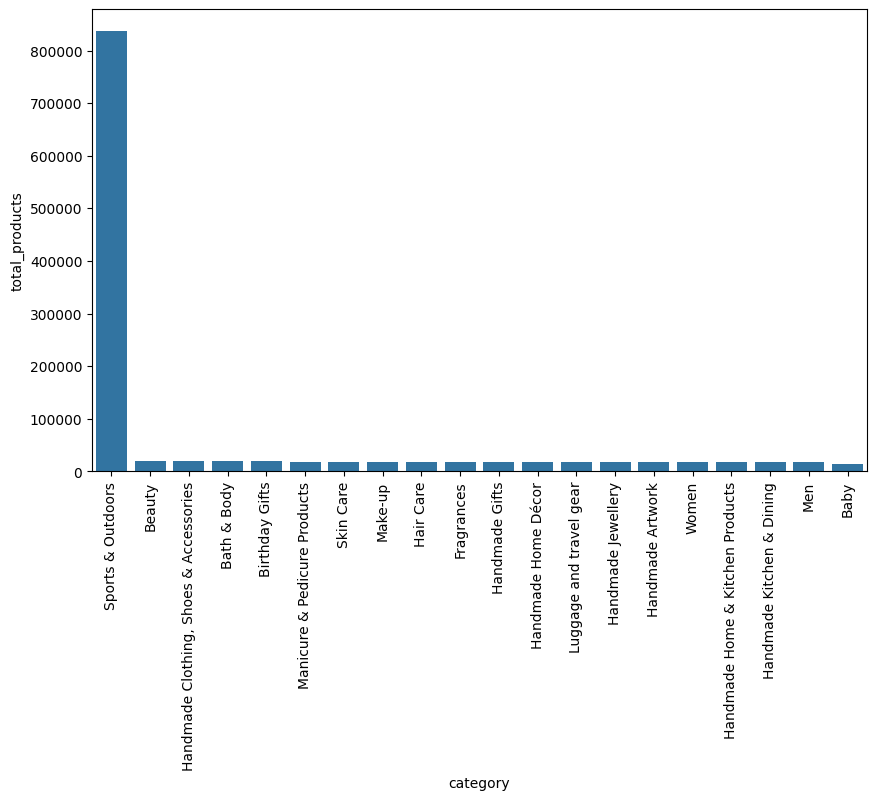

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=freq_table.head(20), x='category', y='total_products');
plt.xticks(rotation=90)

plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [13]:
df.price.describe()

# The mean is $89.24 and the standard deviation is $345.6089. 
# The median is 19.90, which is lower than the mean. 
# This indicates that there are more expensive products that skew the distribution.

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [17]:
print("the price variance:", round(df.price.var(), 2))
print("the price standard deviation:", round(df.price.std(), 2))
print("the price range:", round(df.price.max() - df.price.min(), 2))
print("the price interquartile range:", round(df.price.quantile(0.75) - df.price.quantile(0.25), 2))

the price variance: 119445.49
the price standard deviation: 345.61
the price range: 100000.0
the price interquartile range: 36.0


3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

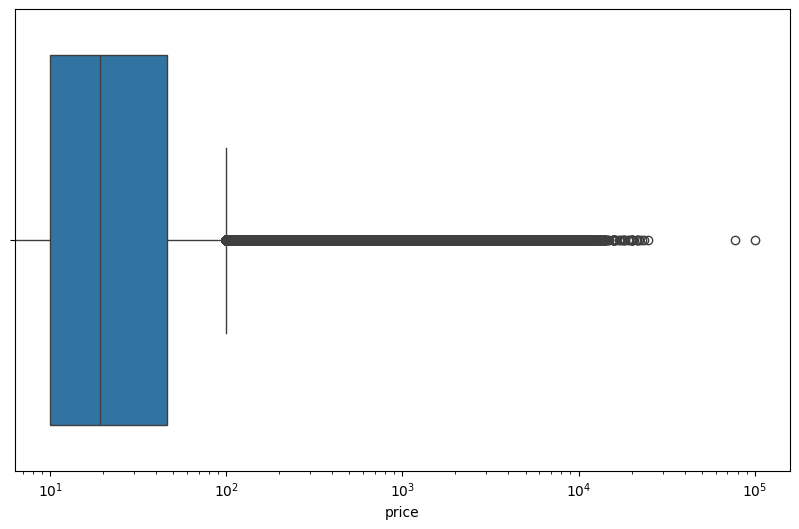

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='price');
plt.show()

# most values are lower than 100. 
# The boxplot shows that there lots of outliers in the data. which makes it difficult to visualise

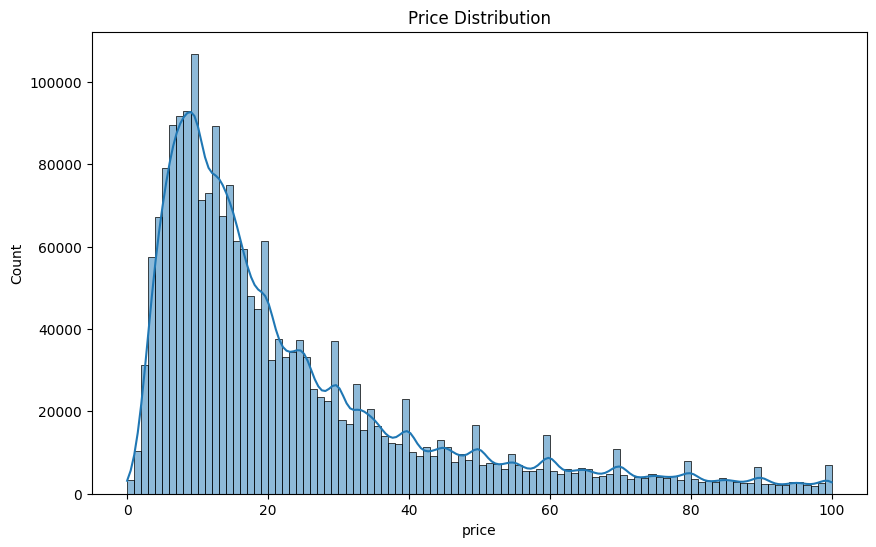

In [25]:
# we can filter out the expensive outliers and use a histogram: 

plt.figure(figsize=(10,6))
sns.histplot(data=df[df.price < 100], x='price',  bins=100, kde=True);
plt.title('Price Distribution')
plt.show()


---

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?